# Text Similarity Coding Task
**Author: Audrey Yip**

Created for CS 315 Project 2, implementing the following algorithm for analyzing text similarity:

1. [Create the vocabulary of all unique terms (each of them will be a dimension)](#1)
2. [Represent each document and the query in the vector space created by these terms](#2)
3. [Calculate the cosine similarity between the query and each document](#3)
4. [Rank the results based on the cosine similarity](#4)

The code compares each sentence to every other sentence.

In [3]:
import pandas as pd
import numpy as np

In [22]:
# sentences from slides: test program

sentences_list = ["As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.",
"Spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities.",
"With the arrival of spring, people begin planning their summer vacations, eager to enjoy the seasonal warmth.",
"The mild spring weather marks the transition from the cold winter to the inviting warmth of summer.",
"During spring, families often start spending more time outdoors, enjoying the season's pleasant temperatures and the promise of summer fun.",
"Summer continues the season's trend of growth and warmth, with gardens full of life and days filled with sunlight.",
"The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring.",
"As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring.",
"The transition into summer brings even warmer temperatures, allowing for beach visits and swimming, much awaited since the spring.",
"Summer vacations are often planned as the days grow longer, a pattern that starts in the spring, culminating in peak summer leisure."]

sentences = [''.join(char for char in sentence if char not in ',.') for sentence in sentences_list]  # remove punctuation
sentences = [sentence.split() for sentence in sentences]   # split into terms
sentences[0]        # check to see each sentence is split

['As',
 'spring',
 'unfolds',
 'the',
 'warmth',
 'of',
 'the',
 'season',
 'encourages',
 'the',
 'first',
 'blossoms',
 'to',
 'open',
 'signaling',
 'longer',
 'days',
 'ahead']

### Step 1: Create the vocabulary of all unique terms (each of them will be a dimension) <a class="anchor" id="1"></a>

In [5]:
terms = [term for sentence in sentences for term in sentence]
unique_terms = list(set(terms))
dim = len(unique_terms)
print('Number of unique terms:', dim)

Number of unique terms: 107


### Step 2: Represent each document and the query in the vector space created by these terms <a class="anchor" id="2"></a>
Each sentence is represented as a vector

In [6]:
# store each vector as a dictionary in vector_list
vector_list = []

for sentence in sentences:
    term_dict = {term: 0 for term in unique_terms}
    for term in sentence:
        term_dict[term] += 1
    
    vector_list.append(term_dict)

# check code
vector_list[0]

{'for': 0,
 'mild': 0,
 'summer': 0,
 'much': 0,
 'brings': 0,
 'are': 0,
 'since': 0,
 'pattern': 0,
 'with': 0,
 'first': 1,
 'eager': 0,
 'outdoor': 0,
 'full': 0,
 'from': 0,
 'awaited': 0,
 'often': 0,
 'also': 0,
 'season': 1,
 'not': 0,
 'warmth': 1,
 'in': 0,
 'promise': 0,
 'activities': 0,
 'seasonal': 0,
 'that': 0,
 'spending': 0,
 'begin': 0,
 'people': 0,
 'cold': 0,
 'began': 0,
 'trend': 0,
 'enjoy': 0,
 'weather': 0,
 'of': 1,
 'flowers': 0,
 'sunlight': 0,
 'continuation': 0,
 'as': 0,
 'Summer': 0,
 'spring': 1,
 'open': 1,
 'The': 0,
 'warm': 0,
 'longer': 1,
 'sunny': 0,
 'arrival': 0,
 'synonymous': 0,
 'starts': 0,
 'temperatures': 0,
 'warmer': 0,
 'their': 0,
 'even': 0,
 'and': 0,
 'beach': 0,
 'to': 1,
 'vacations': 0,
 'pleasant': 0,
 'more': 0,
 'transition': 0,
 'start': 0,
 'life': 0,
 'gardens': 0,
 'growth': 0,
 'families': 0,
 'peak': 0,
 'invites': 0,
 'the': 3,
 'ahead': 1,
 'winter': 0,
 'Spring': 0,
 'With': 0,
 'into': 0,
 "season's": 0,
 'visits'

In [7]:
# create dataframe
df = pd.DataFrame(vector_list)
df.index = range(len(vector_list))
df

,for,mild,summer,much,brings,are,since,pattern,with,first,...,outdoors,marks,blooming,unfolds,days,a,planning,but,During,fun
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
5,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,1,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


### Step 3: Calculate the cosine similarity between the query and each document <a class="anchor" id="3"></a>

In [8]:
# code from lecture
from numpy.linalg import norm

def cosineSimilarity(v1, v2):
    """calculate the cosine similarity between two vectors"""
    V1 = np.array(v1)
    V2 = np.array(v2)
    cosine = np.dot(V1, V2)/(norm(V1)*norm(V2))
    return cosine
 

In [9]:
# create matrix for cosine similarity
num_sentences = df.shape[0]
cos_sim_matrix = np.zeros((num_sentences, num_sentences))
for i in range(num_sentences):
    for j in range(num_sentences):
        cos_sim_matrix[i, j] = cosineSimilarity(df.iloc[i], df.iloc[j])

cos_sim_matrix

array([[1.        , 0.25515518, 0.46829291, 0.55331674, 0.34815531,
        0.2857738 , 0.24056261, 0.40089186, 0.18731716, 0.36028835],
       [0.25515518, 1.        , 0.1720618 , 0.20851441, 0.21320072,
        0.3       , 0.1767767 , 0.27277236, 0.1720618 , 0.1470871 ],
       [0.46829291, 0.1720618 , 1.        , 0.52620136, 0.34238119,
        0.22941573, 0.21629523, 0.40050094, 0.21052632, 0.31494489],
       [0.55331674, 0.20851441, 0.52620136, 1.        , 0.4000988 ,
        0.2502173 , 0.29488391, 0.45501576, 0.33485541, 0.32714433],
       [0.34815531, 0.21320072, 0.34238119, 0.4000988 , 1.        ,
        0.298481  , 0.30151134, 0.37219368, 0.29346959, 0.2926847 ],
       [0.2857738 , 0.3       , 0.22941573, 0.2502173 , 0.298481  ,
        1.        , 0.23570226, 0.17457431, 0.13764944, 0.15689291],
       [0.24056261, 0.1767767 , 0.21629523, 0.29488391, 0.30151134,
        0.23570226, 1.        , 0.46291005, 0.27036904, 0.32357511],
       [0.40089186, 0.27277236, 0.4005009

### Step 4: Rank the results based on the cosine similarity <a class="anchor" id="4"></a>

In [10]:
cos_sim_df = pd.DataFrame(cos_sim_matrix, index=range(1, num_sentences + 1), columns=range(1, num_sentences + 1))
cos_sim_df

,1,2,3,4,5,6,7,8,9,10
1,1.000000,0.255155,0.468293,0.553317,0.348155,0.285774,0.240563,0.400892,0.187317,0.360288
2,0.255155,1.000000,0.172062,0.208514,0.213201,0.300000,0.176777,0.272772,0.172062,0.147087
3,0.468293,0.172062,1.000000,0.526201,0.342381,0.229416,0.216295,0.400501,0.210526,0.314945
4,0.553317,0.208514,0.526201,1.000000,0.400099,0.250217,0.294884,0.455016,0.334855,0.327144
5,0.348155,0.213201,0.342381,0.400099,1.000000,0.298481,0.301511,0.372194,0.293470,0.292685
6,0.285774,0.300000,0.229416,0.250217,0.298481,1.000000,0.235702,0.174574,0.137649,0.156893
7,0.240563,0.176777,0.216295,0.294884,0.301511,0.235702,1.000000,0.462910,0.270369,0.323575
8,0.400892,0.272772,0.400501,0.455016,0.372194,0.174574,0.462910,1.000000,0.200250,0.427960
9,0.187317,0.172062,0.210526,0.334855,0.293470,0.137649,0.270369,0.200250,1.000000,0.179969
10,0.360288,0.147087,0.314945,0.327144,0.292685,0.156893,0.323575,0.427960,0.179969,1.000000


In [11]:
# sort the results
sorted_results = cos_sim_df.unstack().sort_values(ascending=False)
sorted_results = pd.Series(sorted_results)


# filter out all pairs where sentence is compared to itself
sorted_results_filtered = sorted_results[sorted_results < 1.0 - 1e-5]   # deal with floating point
sorted_results_filtered

1   4     0.553317
4   1     0.553317
    3     0.526201
3   4     0.526201
1   3     0.468293
            ...   
6   10    0.156893
2   10    0.147087
10  2     0.147087
6   9     0.137649
9   6     0.137649
Length: 90, dtype: float64

In [12]:
sorted_results_df = sorted_results_filtered.reset_index()
sorted_results_df.columns = ['Sentence 1', 'Sentence 2', 'Cosine Similarity']
sorted_results_df

,Sentence 1,Sentence 2,Cosine Similarity
0,1,4,0.553317
1,4,1,0.553317
2,4,3,0.526201
3,3,4,0.526201
4,1,3,0.468293
...,...,...,...
85,6,10,0.156893
86,2,10,0.147087
87,10,2,0.147087
88,6,9,0.137649


In [24]:
# create dictionary for labels
sentence_labels = {}
for i, sentence in enumerate(sentences, start=1):
    trunc_sentence = sentence[:30]  # truncate sentences
    sentence_labels[i] = trunc_sentence      

labels = [sentence[:30] + '...' for sentence in sentences_list]
labels

['As spring unfolds, the warmth ...',
 'Spring brings not only bloomin...',
 'With the arrival of spring, pe...',
 'The mild spring weather marks ...',
 'During spring, families often ...',
 "Summer continues the season's ...",
 'The summer season is synonymou...',
 'As summer arrives, the warm we...',
 'The transition into summer bri...',
 'Summer vacations are often pla...']

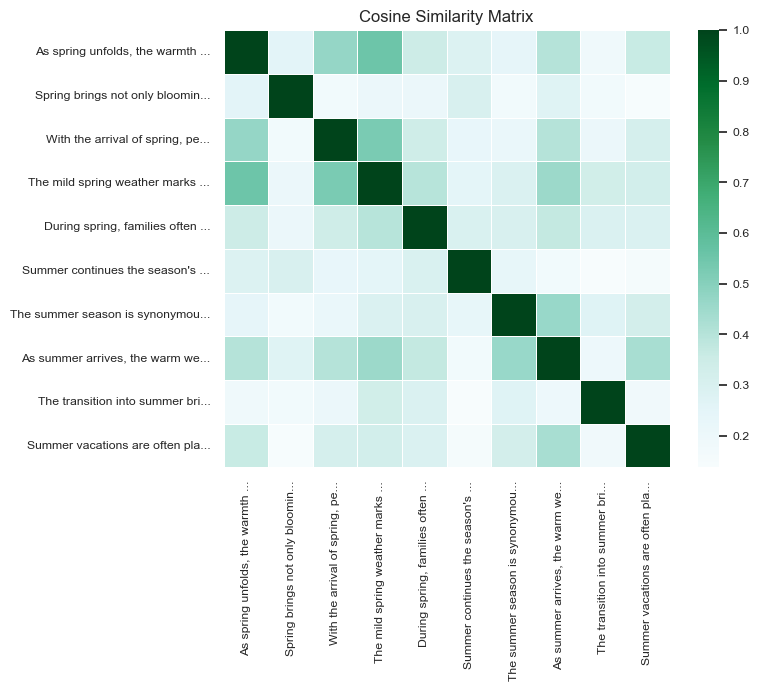

In [28]:
# create a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 7))
sns.set(font_scale=0.8)  # Adjust font size
sns.heatmap(cos_sim_df, 
            cmap='BuGn', # set color map Blue to Green
            annot=False, # do not show the numerical values in each cell
            linewidths=0.5, # width of lines that separate the cells in the map
            xticklabels=labels,  # use sentences as labels for both axes
            yticklabels=labels) 

# directly set title
plt.title('Cosine Similarity Matrix', fontsize=12)

plt.tight_layout()
plt.show()
